Goals

* learn how to use matplotlib


In [1]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

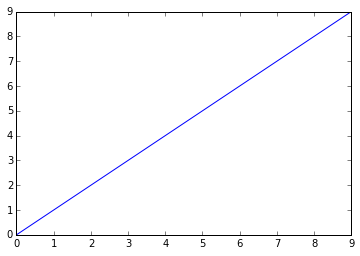

In [3]:
# plot different types of graphs to show distribution of populations
# Chap 8 of PfDA
# http://my.safaribooksonline.com/book/programming/python/9781449323592/8dot-plotting-and-visualization/id2802076

# hello world of mpl

plt.plot(np.arange(10))


In [4]:
fig = plt.figure()

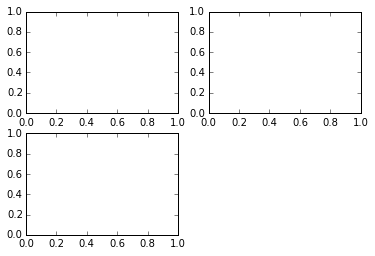

In [5]:
# set up a 2x2 grid of subplots and instantiate 3 of them

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

fig

PfDA: 

<blockquote>When you issue a plotting command like <code>plt.plot([1.5, 3.5, -2, 1.6])</code>, matplotlib draws on the last figure and subplot used (creating one if necessary), thus hiding the figure and subplot creation</blockquote>

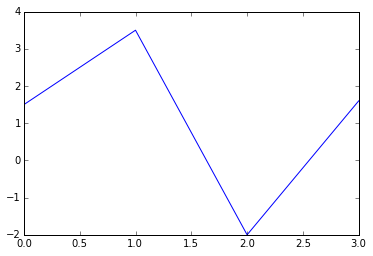

In [6]:
plt.plot([1.5, 3.5, -2, 1.6])

/Users/raymondyee/anaconda/envs/myenv/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


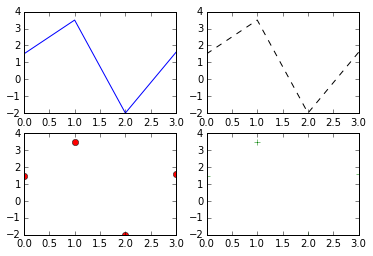

In [7]:
import math
options = [None, 'k--', 'ro', 'g+']

fig = plt.figure()

# let's plot subplot 2 columns wide
# try different options

num_row = math.ceil(len(options)/2.0)

for (i, option) in enumerate(options):
    ax = fig.add_subplot(num_row,2, i+1)
    
    if option is not None:
        ax.plot([1.5, 3.5, -2, 1.6], option)
    else:
        ax.plot([1.5, 3.5, -2, 1.6])

fig.show()

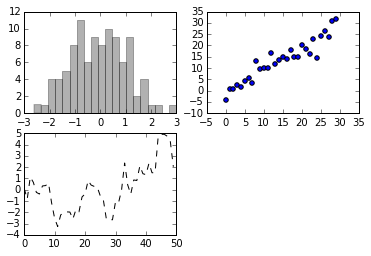

In [8]:
from numpy.random import randn

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
ax3.plot(randn(50).cumsum(), 'k--')

fig.show()

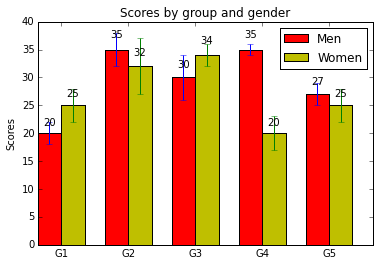

In [9]:
#http://matplotlib.org/examples/api/barchart_demo.html

import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, womenMeans, width, color='y', yerr=womenStd)

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


# World

going back to our calculation from [Day_01_B_World_Population.ipynb](http://nbviewer.ipython.org/github/rdhyee/working-open-data-2014/blob/master/notebooks/Day_01_B_World_Population.ipynb)

In [10]:
# https://gist.github.com/rdhyee/8511607/raw/f16257434352916574473e63612fcea55a0c1b1c/population_of_countries.json
# scraping of https://en.wikipedia.org/w/index.php?title=List_of_countries_by_population_(United_Nations)&oldid=590438477

# read population in
import json
import requests

pop_json_url = "https://gist.github.com/rdhyee/8511607/raw/f16257434352916574473e63612fcea55a0c1b1c/population_of_countries.json"
pop_list= requests.get(pop_json_url).json()
pop_list

[[1, u'China', 1385566537],
 [2, u'India', 1252139596],
 [3, u'United States', 320050716],
 [4, u'Indonesia', 249865631],
 [5, u'Brazil', 200361925],
 [6, u'Pakistan', 182142594],
 [7, u'Nigeria', 173615345],
 [8, u'Bangladesh', 156594962],
 [9, u'Russia', 142833689],
 [10, u'Japan', 127143577],
 [11, u'Mexico', 122332399],
 [12, u'Philippines', 98393574],
 [13, u'Ethiopia', 94100756],
 [14, u'Vietnam', 91679733],
 [15, u'Germany', 82726626],
 [16, u'Egypt', 82056378],
 [17, u'Iran', 77447168],
 [18, u'Turkey', 74932641],
 [19, u'Congo, Democratic Republic of the', 67513677],
 [20, u'Thailand', 67010502],
 [21, u'France', 64291280],
 [22, u'United Kingdom', 63136265],
 [23, u'Italy', 60990277],
 [24, u'Myanmar', 53259018],
 [25, u'South Africa', 52776130],
 [26, u'Korea, South', 49262698],
 [27, u'Tanzania', 49253126],
 [28, u'Colombia', 48321405],
 [29, u'Spain', 46926963],
 [30, u'Ukraine', 45238805],
 [31, u'Kenya', 44353691],
 [32, u'Argentina', 41446246],
 [33, u'Algeria', 3920819

In [11]:
country_num = range(len(pop_list))
country_names = [c[1] for c in pop_list]
country_pops = [int(c[2]) for c in pop_list]

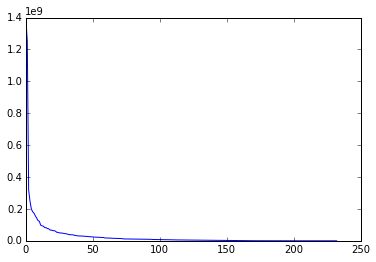

In [12]:
plt.plot(country_pops)

In [13]:
from itertools import izip, islice
sampled_country_tuples = list(islice(izip(country_num, country_names),0,None,10))
sampled_i = [s[0] for s in sampled_country_tuples]
sampled_countries = [s[1] for s in sampled_country_tuples]

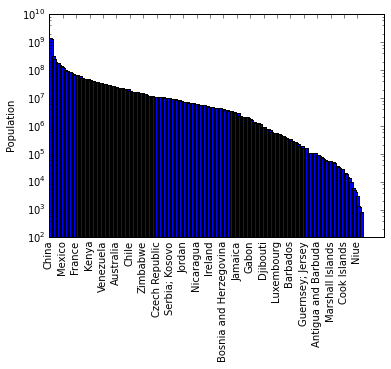

In [14]:
# bar charts
# can find barh: http://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar

plt.bar(left=map(lambda x: x, range(len(country_pops))),height=country_pops, width=2, log='x')
#plt.xticks(range(len(country_pops)), country_names, rotation='vertical')
plt.xticks(sampled_i, sampled_countries, rotation='vertical')
plt.ylabel('Population')
plt.show()

In [15]:
# what if we make a DataFrame from pop_list
df = DataFrame(pop_list)

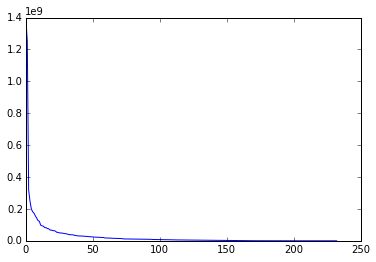

In [16]:
plt.plot(df[2])

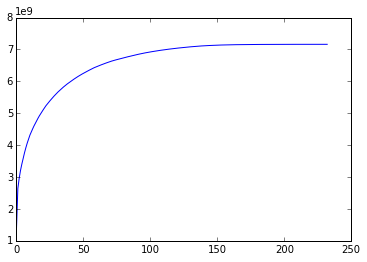

In [17]:
plt.plot(df[2].cumsum())